In [14]:
import re
import csv
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from numpy.lib.recfunctions import append_fields, drop_fields
from matplotlib.patches import Ellipse

In [15]:
dir = 'ml-latest-small'
genres = np.array(['Action', 'Adventure', 'Animation', "Children", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', '(no genres listed)'])

## Read Dataset

### Ratings

In [16]:
ratings = np.genfromtxt(
    f'{dir}/ratings.csv',
    delimiter=',',
    names=True,
    dtype=None,
)

ratings_year = ratings['timestamp'].astype('<M8[s]').astype('datetime64[Y]').astype(np.int64) + 1970
ratings = append_fields(ratings, 'year', ratings_year)
ratings = drop_fields(ratings, 'timestamp')

ratings

array([(  1,      1, 4., 2000), (  1,      3, 4., 2000),
       (  1,      6, 4., 2000), ..., (610, 168250, 5., 2017),
       (610, 168252, 5., 2017), (610, 170875, 3., 2017)],
      dtype=[('userId', '<i8'), ('movieId', '<i8'), ('rating', '<f8'), ('year', '<i8')])

### Movies

In [17]:
with open(f'{dir}/movies.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    movies_csv  = ('\t'.join(i) for i in reader)
    movies = np.genfromtxt(
        movies_csv,
        delimiter='\t',
        names=True,
        dtype=None,
        invalid_raise=False,
    )

year_patten = ' \((\d{4})\)'
movies_year = np.array([int(re.search(year_patten, i).group(1)) if re.search(year_patten, i) else np.nan for i in movies['title']])
movies = append_fields(movies, 'year', movies_year)

movies

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConversionWarning: Some errors were detected !
    Line #3203 (got 2 columns instead of 3)
    Line #5730 (got 2 columns instead of 3)
    Line #7557 (got 2 columns instead of 3)
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  if __name__ == '__main__':


masked_array(data=[(1, 'Toy Story (1995)', 'Adventure|Animation|Children|Comedy|Fantasy', 1995.0),
                   (2, 'Jumanji (1995)', 'Adventure|Children|Fantasy', 1995.0),
                   (3, 'Grumpier Old Men (1995)', 'Comedy|Romance', 1995.0),
                   ..., (193585, 'Flint (2017)', 'Drama', 2017.0),
                   (193587, 'Bungo Stray Dogs: Dead Apple (2018)', 'Action|Animation', 2018.0),
                   (193609, 'Andrew Dice Clay: Dice Rules (1991)', 'Comedy', 1991.0)],
             mask=[(False, False, False, False),
                   (False, False, False, False),
                   (False, False, False, False), ...,
                   (False, False, False, False),
                   (False, False, False, False),
                   (False, False, False, False)],
       fill_value=(999999, 'N/A', 'N/A', 1.e+20),
            dtype=[('movieId', '<i8'), ('title', '<U158'), ('genres', '<U77'), ('year', '<f8')])

### One-Hot genres in movies

In [78]:
movies_genres = np.array(np.zeros(movies.shape[0], dtype=bool), dtype=[(i, '<b') for i in genres])

for i, genre_str in enumerate(movies['genres']):
    genre_list = genre_str.split('|')
    
    movies_genres[genre_list][i] = True

movies_genres

array([(0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       (0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       (0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0), ...,
       (0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       (1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       (0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)],
      dtype=[('Action', 'i1'), ('Adventure', 'i1'), ('Animation', 'i1'), ('Children', 'i1'), ('Comedy', 'i1'), ('Crime', 'i1'), ('Documentary', 'i1'), ('Drama', 'i1'), ('Fantasy', 'i1'), ('Film-Noir', 'i1'), ('Horror', 'i1'), ('IMAX', 'i1'), ('Musical', 'i1'), ('Mystery', 'i1'), ('Romance', 'i1'), ('Sci-Fi', 'i1'), ('Thriller', 'i1'), ('War', 'i1'), ('Western', 'i1'), ('(no genres listed)', 'i1')])

## Plot Chart

<BarContainer object of 119 artists>

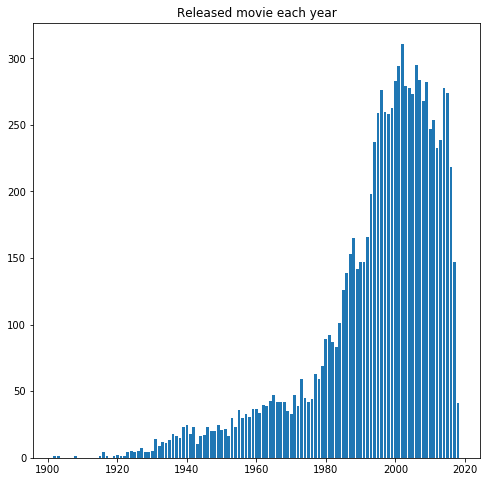

In [101]:
movies_year, movies_count = np.unique(movies['year'], return_counts=True)

plt.figure(figsize=(8, 8))
plt.title('Released movie each year')
plt.bar(movies_year, movies_count)

<BarContainer object of 23 artists>

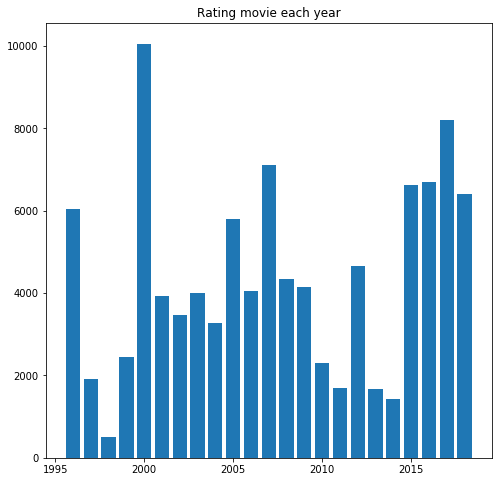

In [100]:
ratings_year, ratings_count = np.unique(ratings['year'], return_counts=True)

plt.figure(figsize=(8, 8))
plt.title('Rating movie each year')
plt.bar(ratings_year, ratings_count)

<BarContainer object of 20 artists>

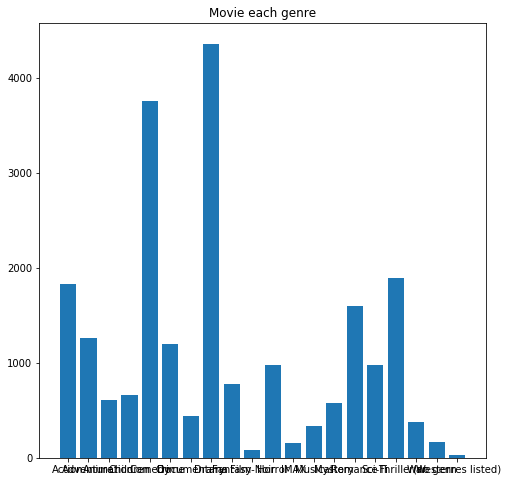

In [99]:
genres_count = movies_genres.view(np.bool).reshape(-1, genres.shape[0]).sum(axis=0)

plt.figure(figsize=(8, 8))
plt.title('Movie each genre')
plt.bar(genres, genres_count)

Text(0.5, 1.0, 'Movie each genre each year')

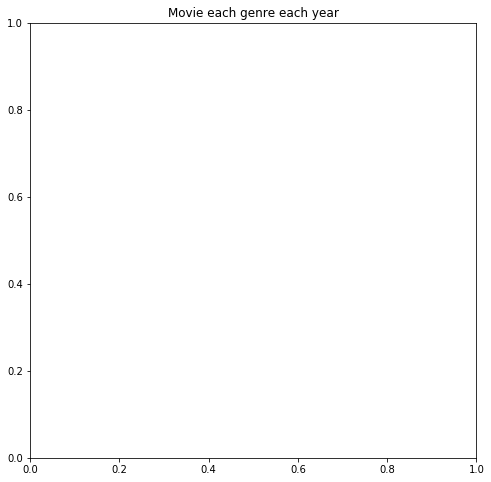

In [102]:
plt.figure(figsize=(8, 8))
plt.title('Movie each genre each year')

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

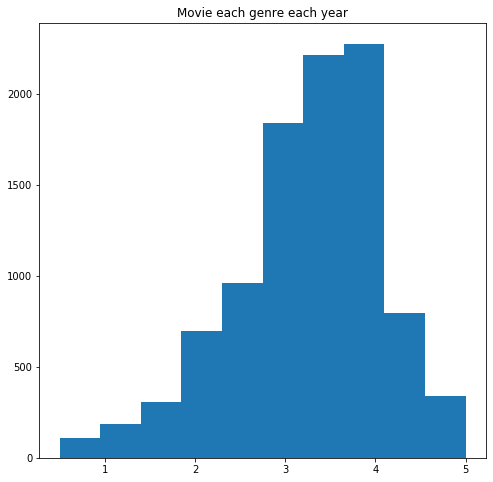

In [110]:
movie_id, movie_idx, movie_count = np.unique(ratings['movieId'], return_inverse=True, return_counts=True)
movie_sum = np.bincount(movie_idx, weights=ratings['rating'])
movie_mean = movie_sum / movie_count

plt.figure(figsize=(8, 8))
plt.title('Movie each genre each year')
plt.hist(movie_mean)